In [1]:
import import_ipynb
import cv2
from timeit import default_timer as timer
from collections import OrderedDict

from model_development import *
from extra_models import *

importing Jupyter notebook from model_development.ipynb
Platform: Local machine
TorchMetrics already installed.
(set(), set())
Index: 1555
Input Image: Datasets/RESIDE-6K/train/hazy/2399.jpg
Target Image: Datasets/RESIDE-6K/train/GT/2399.jpg
Input Image: Datasets/RESIDE-6K/train/hazy/1233.jpg
Target Image: Datasets/RESIDE-6K/train/GT/1233.jpg
Input Image: Datasets/RESIDE-6K/train/hazy/1503.jpg
Target Image: Datasets/RESIDE-6K/train/GT/1503.jpg
Input Image: Datasets/RESIDE-6K/train/hazy/166.jpg
Target Image: Datasets/RESIDE-6K/train/GT/166.jpg
Datasets/RESIDE-6K/train/hazy/513.jpg
Image size: [1, 3, 400, 400]
L1 Loss: 0.2561 | PSNR: 10.5424 | SSIM: 58.60%
(set(), set())
Index: 435
Input Image: Datasets/RESIDE-6K/test/hazy/1407_10.png
Target Image: Datasets/RESIDE-6K/test/GT/1407_10.png
Datasets/RESIDE-6K/test/hazy/0285_0.85_0.2.jpg
Image size: [1, 3, 412, 548]
L1 Loss: 0.2434 | PSNR: 11.3862 | SSIM: 27.43%
importing Jupyter notebook from extra_models.ipynb


In [2]:
model_0 = dehazeformer_b().to(device)
state_dict_name_0 = 'other/dehazeformer-b.pth'

model_1 = dehazeformer_s().to(device)
state_dict_name_1 = 'other/dehazeformer-s.pth'

model_2 = MixDehazeNet_l().to(device)
state_dict_name_2 = 'other/MixDehazeNet-l.pth'

model_3 = LightClearNet().to(device)
state_dict_name_3 = 'LightClearNet_2024-04-11_15-52-13_5epochs.pth'

c:\Users\Kamal\anaconda3\Lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [3]:
state_dict_loc = os.path.join(model_save_path, state_dict_name_0)

state_dict = torch.load(state_dict_loc)['state_dict']
new_state_dict = OrderedDict()

for k, v in state_dict.items():
    name = k[7:]
    new_state_dict[name] = v

model_0.load_state_dict(new_state_dict)

<All keys matched successfully>

In [4]:
state_dict_loc = os.path.join(model_save_path, state_dict_name_1)

state_dict = torch.load(state_dict_loc)['state_dict']
new_state_dict = OrderedDict()

for k, v in state_dict.items():
    name = k[7:]
    new_state_dict[name] = v

model_1.load_state_dict(new_state_dict)

<All keys matched successfully>

In [5]:
state_dict_loc = os.path.join(model_save_path, state_dict_name_2)

state_dict = torch.load(state_dict_loc)['state_dict']
new_state_dict = OrderedDict()

for k, v in state_dict.items():
    name = k[7:]
    new_state_dict[name] = v

model_2.load_state_dict(new_state_dict)

<All keys matched successfully>

In [6]:
model_3.load_state_dict(torch.load(os.path.join(model_save_path, state_dict_name_3)))

<All keys matched successfully>

In [7]:
width = 240
height = 200
gap = 10

In [8]:
resize_tensor = transforms.Compose([
    transforms.Resize((height, width))
])

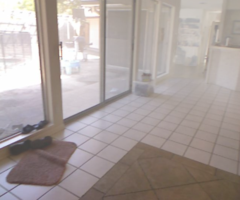

In [9]:
resize_tensor(tensor_to_img(random.choice(test_dataset)[0]))

In [10]:
def visualize_random_all_models(dataset):
    random_idx = random.randrange(len(dataset))
    print(dataset.inputs_folder + '/' + dataset.inputs_file_list[random_idx])

    input, target = [resize_tensor(tensor).unsqueeze(0) for tensor in dataset[random_idx]]
    print(f'Image size: {[*input.shape]}')

    model.eval()
    with torch.inference_mode():
        pred_0 = model_0(input)
        pred_1 = model_1(input)
        pred_2 = model_2(input)
        pred_3 = model_3(input)
    pred_0 = normalize_tensor(pred_0)
    pred_1 = normalize_tensor(pred_1)
    pred_2 = normalize_tensor(pred_2)

    loss = criterion(pred_3, target).item()
    psnr = psnr_metric(pred_3, target).item()
    ssim = ssim_metric(pred_3, target).item()

    print(f'L1 Loss: {loss:.4f} | PSNR: {psnr:.4f} | SSIM: {ssim * 100:.2f}%')

    input = tensor_to_img(input.squeeze())
    pred_0 = tensor_to_img(pred_0.squeeze())
    pred_1 = tensor_to_img(pred_1.squeeze())
    pred_2 = tensor_to_img(pred_2.squeeze())
    pred_3 = tensor_to_img(pred_3.squeeze())
    target = tensor_to_img(target.squeeze())

    new_image = Image.new('RGB', (width + gap + width + gap + width + gap + width + gap + width + gap + width, height), color='white')
    new_image.paste(input, (0, 0))
    new_image.paste(pred_0, (width + gap, 0))
    new_image.paste(pred_1, (width + gap + width + gap, 0))
    new_image.paste(pred_2, (width + gap + width + gap + width + gap, 0))
    new_image.paste(pred_3, (width + gap + width + gap + width + gap + width + gap, 0))
    new_image.paste(target, (width + gap + width + gap + width + gap + width + gap + width + gap, 0))

    return new_image

Datasets/RESIDE-6K/test/hazy/0303_0.9_0.12.jpg
Image size: [1, 3, 200, 240]
L1 Loss: 0.0642 | PSNR: 21.5201 | SSIM: 89.14%


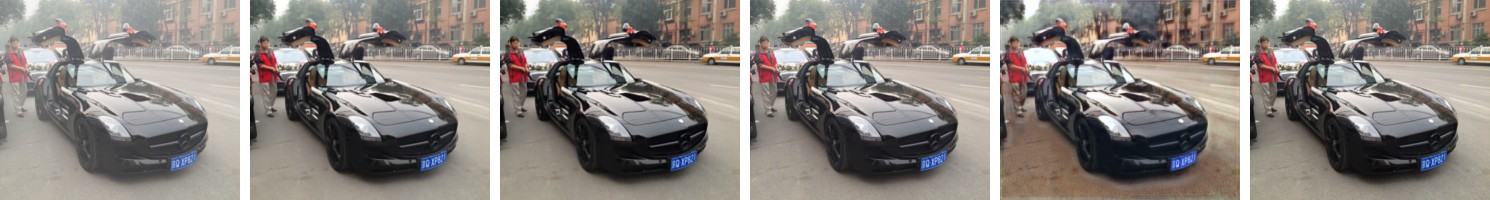

In [19]:
visualize_random_all_models(test_dataset)